### Color Threshold, Blue Screen

#### Import Resources

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline


#### Read and display the image

In [2]:
# Read in the image
image = cv2.imread("images/pizza_bluescreen.jpg")

# Print out the type of image data and it's dimention(height, width, and color)
print("This ismage is :", type(image),
      "with dimensions :", image.shape)

This ismage is : <class 'numpy.ndarray'> with dimensions : (514, 816, 3)


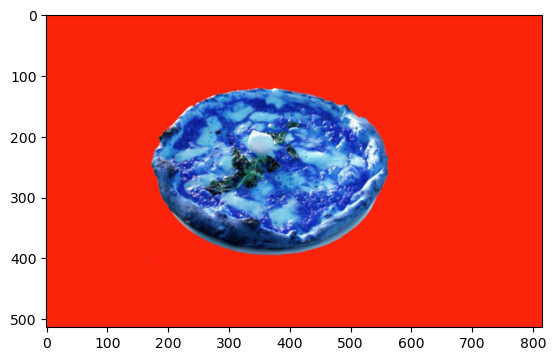

In [5]:
plt.imshow(image) # Background is in RED, because openCV reads the color as BGR not RGB so we have to convert if we want to use 

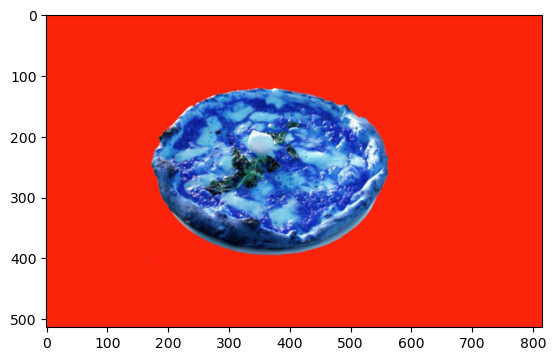

In [7]:
# Make a copy of the image so that it won't affect the original image
image_copy = np.copy(image)
plt.imshow(image_copy)

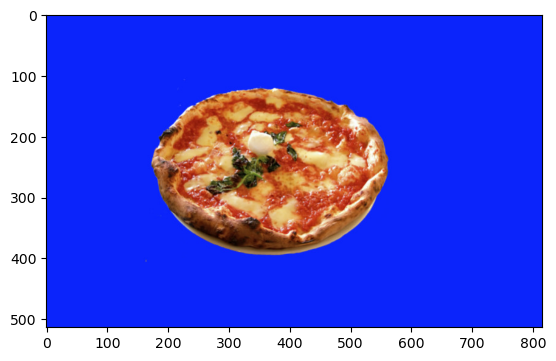

In [10]:
# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# Display the image copy
plt.imshow(image_copy)  #now it's changed to RGB

#### Define the color threshold

In [16]:
## TODO : Define the color selection boundaries in RGB values 
# play around with these values until yoy isolate the blue background

lower_blue = np.array([0, 0, 230])
upper_blue = np.array([50, 70, 255])

#### Create a mask

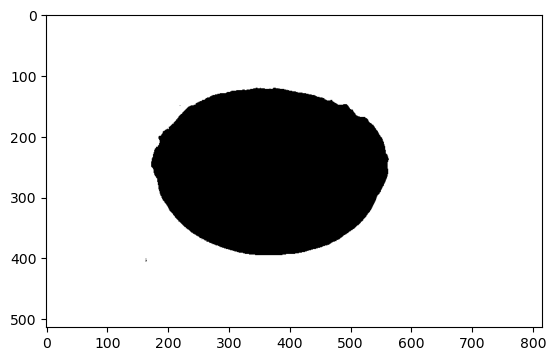

In [17]:
# Define the masked area
"""
cv2.inRange(): This function is from the OpenCV library and is used to create a mask. A mask is a binary 
image (an image where each pixel is either black or white) that indicates which pixels of an input image 
fall within a specified range of colors.
"""

mask = cv2.inRange(image_copy, lower_blue, upper_blue) # if the above defined colors are 
# Visualize the mask
plt.imshow(mask, cmap='gray')

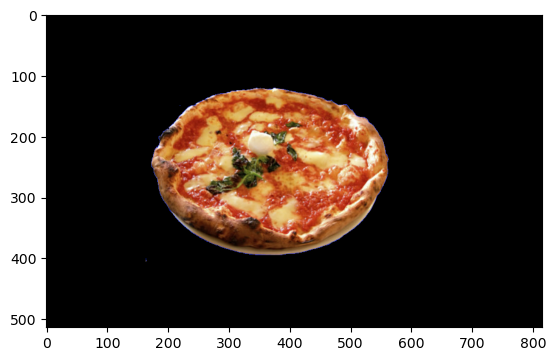

In [18]:
masked_image = np.copy(image_copy)

# Making all area black if the color is not black in the above image
masked_image[mask != 0 ] = [0, 0, 0]

# Display it 
plt.imshow(masked_image)

#### Mask and add a background image

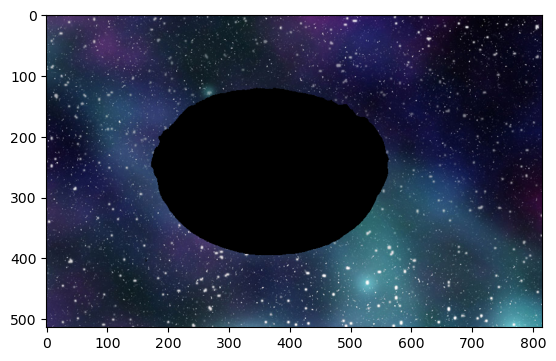

In [19]:
# Load in a background image, and convert it to RGB
background_image = cv2.imread('images/space_background.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

# Crop it to the right size 
crop_background = background_image[0:514, 0:816] # making this image equal to the above image

# Mask the cropped background so that the pizz a area is blocked
crop_background[mask == 0] = [0, 0, 0]

# Display the background
plt.imshow(crop_background)

#### Create a complete image

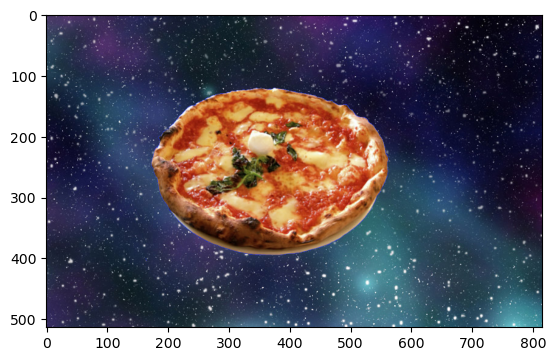

In [20]:
# Add the two images together to create a complete image!
complete_image = masked_image + crop_background

# Display the result
plt.imshow(complete_image)